10
25
50
100
256


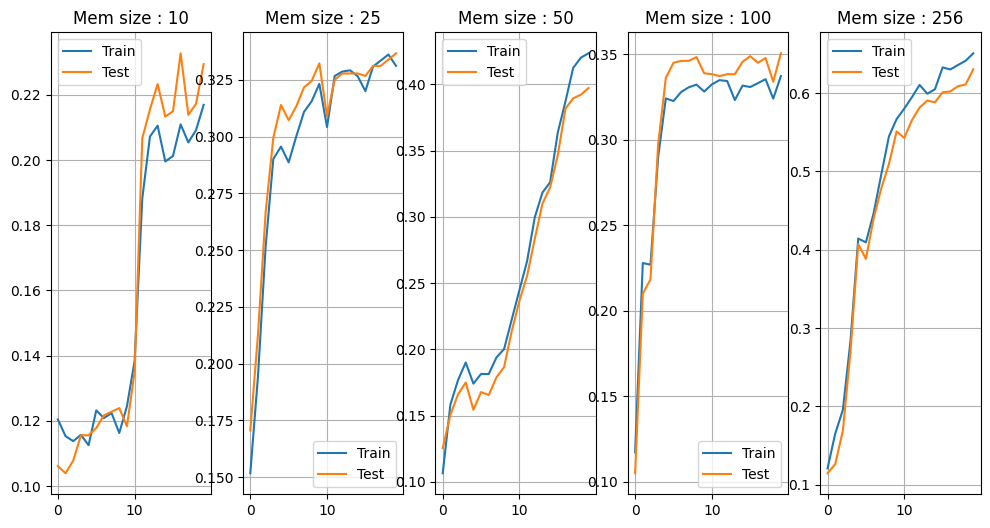

In [25]:
import pickle as pkl
import glob
import matplotlib.pyplot as plt
import numpy as np

gloober = glob.glob("grid_search13/*")

figs, axs = plt.subplots(1,5,figsize=(12,6))

best_acc_yet = [0, 0]

list_to_rearange = [4,0,1,7,3]

rearange = [0,0,0,0,0]

for i in range(5):
    rearange[i] = gloober[list_to_rearange[i]]

gloober = rearange

for idx, glob in enumerate(gloober):

    with open(glob, "rb") as f:
        results = pkl.load(f)
        print(len(results["Model Parameters"][0][1][0]))
        axs[idx].plot(results["Accuracy Measurements"]["Training accuracy"], label="Train")
        axs[idx].plot(results["Accuracy Measurements"]["Testing accuracy"], label="Test")
        axs[idx].grid()
        axs[idx].set_title(f"Mem size : {len(results['Model Parameters'][0][1][0])}")
        axs[idx].legend()
        if np.max(results["Accuracy Measurements"]["Testing accuracy"]) > best_acc_yet[0]:
                best_acc_yet[0] = np.max(results["Accuracy Measurements"]["Testing accuracy"])
                best_acc_yet[1] = glob

plt.savefig("Different_mem_sizes.pdf")